# Key Concepts

## 1. NDVI (Normalized Difference Vegetation Index)
Measures vegetation health using satellite data:
Where:-

NIR = Near-Infrared reflectance
Red = Red reflectance
## 2. Data Challenges
Noise: The main challenge with the dataset is that both the imagery and the crowdsourced data contain noise (due to cloud cover in the images and inaccurate labeling/digitizing of polygons).

**Missing Data**: Certain NDVI values are missing because of cloud cover obstructing the satellite view.

**Temporal Variations**: NDVI values vary seasonally, requiring careful feature engineering to extract meaningful trends.

*Important Note:*
*The training and public leaderboard test data may contain noisy observations, while the private leaderboard data is clean and free of noise. This design helps evaluate how well your model generalizes beyond noisy training conditions.*

## Dataset
Each row in the dataset contains:

**class**: Ground truth label of the land cover type — one of {Water, Impervious, Farm, Forest, Grass, Orchard}

**ID**:Unique identifier for the sample

27 NDVI Time Points: Columns labeled in the format YYYYMMDD_N (e.g., 20150720_N, 20150602_N) represent NDVI values collected on different dates. These values form a time series representing vegetation dynamics for each location.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('hacktrain.csv')
df.sample(10)

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
1600,2032,2033,forest,6876.34,7951.64,5146.530,7516.64,7515.300,7598.530,1976.800,...,8066.900,1310.59,3106.380,6062.06,816.685,4388.410,7573.280,7708.73,7499.250,2554.360
7222,9177,9178,farm,3012.44,3516.47,3715.990,3821.61,1198.320,7348.970,7240.720,...,4624.840,3658.22,3348.540,3076.18,1447.050,1351.140,330.349,7560.78,474.265,918.574
1123,1434,1435,forest,NaN,NaN,3717.340,6998.47,6477.370,3929.320,7088.580,...,8090.480,6916.95,NaN,5717.69,6988.740,1170.220,7410.850,8004.82,4480.420,752.044
5260,6420,6421,forest,4118.20,6042.73,NaN,6490.96,476.939,3777.630,6007.500,...,809.063,1167.20,427.735,NaN,379.642,659.851,NaN,5403.77,2912.010,6728.700
2590,3237,3238,forest,7407.87,7539.92,7368.570,6525.83,962.102,7768.380,814.056,...,8489.970,6808.55,4394.210,5537.83,6651.720,861.167,7300.590,7894.26,NaN,1300.740
2329,2909,2910,forest,7586.45,8196.16,609.903,2938.80,6644.000,7595.260,NaN,...,7960.850,NaN,3312.740,2387.85,1995.990,1097.160,4827.240,7188.40,3072.810,NaN
3263,4028,4029,forest,NaN,1216.23,6862.350,7673.74,341.415,NaN,NaN,...,528.244,NaN,NaN,842.72,7726.970,6652.550,658.701,7391.70,389.781,881.087
1557,1977,1978,forest,1305.19,8200.94,724.491,7423.21,NaN,2263.120,7150.110,...,8039.490,1189.40,1192.230,2604.99,6605.110,790.273,NaN,7368.32,1675.060,NaN
3959,4866,4867,forest,7914.82,7537.35,2212.650,8104.65,424.797,376.511,711.323,...,7846.500,NaN,1849.310,NaN,381.608,939.817,308.053,6991.65,NaN,396.061
6867,8563,8564,farm,2432.11,NaN,845.897,6654.72,901.928,6899.880,4593.310,...,5637.950,1906.20,4499.650,3317.83,279.647,NaN,699.507,5503.43,NaN,2098.570


In [65]:
df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [67]:
df.shape

(8000, 30)

In [68]:
df['class'].unique()

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

**class** is of object type so its a classification type problem that also multiclass classification.

In [69]:
df.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


The describe count is not matching so the dataset contains null/missing values

In [70]:
nullvals = df.isnull().sum()
nullvals

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [71]:
max(df.isnull().sum())

1760

*Approximately 22% of the data*

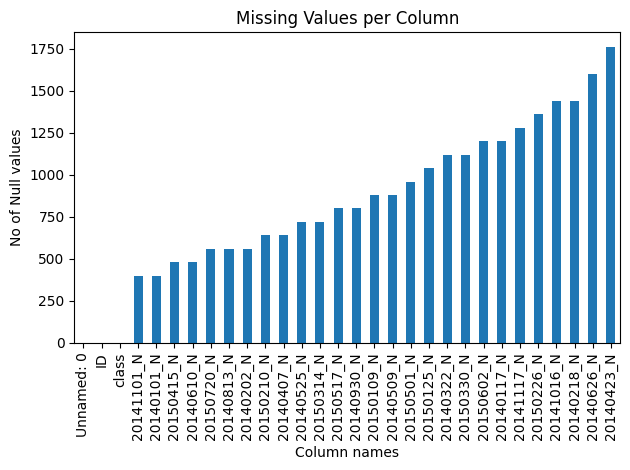

In [72]:
nullvals.sort_values().plot(kind='bar')
plt.xlabel('Column names')
plt.ylabel('No of Null values')
plt.title("Missing Values per Column")
plt.tight_layout()
plt.show()

*Filling the NUll vals with mean*

In [73]:
df[df.select_dtypes(include="number").columns] = df.select_dtypes(include="number").fillna(df.mean(numeric_only=True))

<Axes: >

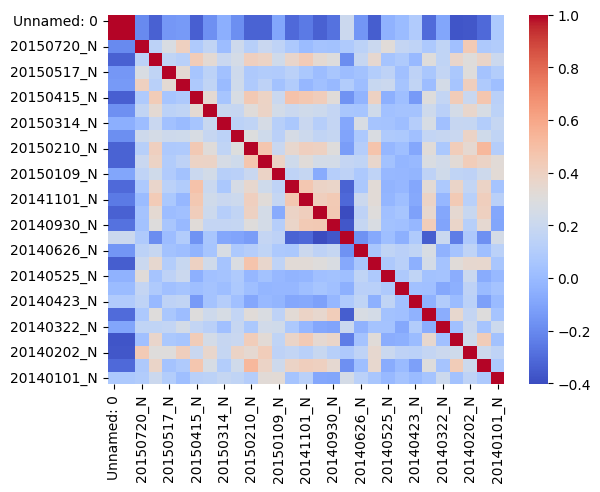

In [74]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm')

Making dataset more readable and inferable

In [75]:
ndvi_columns = [col for col in df.columns if col.endswith('_N')]

df['ndvi_mean'] = df[ndvi_columns].mean(axis=1)
df['ndvi_std'] = df[ndvi_columns].std(axis=1)
df['ndvi_min'] = df[ndvi_columns].min(axis=1)
df['ndvi_max'] = df[ndvi_columns].max(axis=1)
df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']
df['ndvi_median'] = df[ndvi_columns].median(axis=1)
df['ndvi_skew'] = df[ndvi_columns].skew(axis=1)
df

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140202_N,20140117_N,20140101_N,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_skew
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.360000,997.904000,-1739.990000,630.087000,...,-2203.020,-1180.190000,433.906,343.448055,1875.808490,-2203.020,4987.520158,7190.540158,433.906,0.936581
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.320000,914.198000,-692.386000,707.626000,...,-2250.000,-1360.560000,524.075,-62.798231,1359.282039,-2250.000,4872.681670,7122.681670,214.200,1.571755
2,3,4,water,58.0174,-1599.160000,4469.837748,-1052.630000,2927.586705,-1564.630000,3313.881373,...,-2202.120,2629.203972,-1343.550,653.996916,2124.035801,-3162.140,5237.037739,8399.177739,369.214,0.410708
3,4,5,water,72.5180,4868.091395,380.436000,-1256.930000,515.805000,-1413.180000,-802.942000,...,-2197.360,2629.203972,-826.727,131.198959,1602.465853,-2829.400,4868.091395,7697.491395,298.320,0.906417
4,7,8,water,1136.4400,4868.091395,4469.837748,1647.830000,1935.800000,4924.493648,2158.980000,...,-116.801,-568.050000,-1357.140,1350.864018,1951.032950,-2646.050,4987.520158,7633.570158,1242.870,0.279995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620000,4469.837748,1166.250000,937.478000,1072.700000,823.896000,...,979.795,2629.203972,433.659,1330.604655,979.299633,362.882,4469.837748,4106.955748,1044.110,1.844991
7996,10538,10539,impervious,2170.3500,1419.720000,1361.000000,1478.710000,983.911000,1262.110000,1422.860000,...,771.747,1589.060000,506.936,1315.889124,648.106341,336.289,3055.167358,2718.878358,1372.680,0.618200
7997,10541,10542,impervious,1895.6800,1454.740000,4469.837748,1033.560000,1930.380000,1057.150000,1471.600000,...,1818.650,2501.720000,1247.770,1829.199720,1044.955984,447.868,4987.520158,4539.652158,1471.600,1.618611
7998,10542,10543,impervious,3465.7400,1283.320000,413.412000,4391.050000,1146.820000,4473.050000,1614.750000,...,3759.710,2629.203972,388.346,2408.253504,1632.454703,244.594,5833.760000,5589.166000,2374.800,0.276877


Adding new cols with season based metrics

In [76]:
season_map = {'spring': [], 'summer': [], 'monsoon': [], 'autumn': [], 'winter': []}
for col in ndvi_columns:
    month = int(col.split('_')[0][4:6])
    if month in [3, 4, 5]:
        season_map['spring'].append(col)
    elif month in [6, 7]:
        season_map['summer'].append(col)
    elif month in [8, 9]:
        season_map['monsoon'].append(col)
    elif month == 10:
        season_map['autumn'].append(col)
    elif month in [11, 12, 1, 2]:
        season_map['winter'].append(col)

print(season_map)

for season, cols in season_map.items():
    if cols:
        df[f'{season}_mean'] = df[cols].mean(axis=1)
        if len(cols) > 1:
            df[f'{season}_std'] = df[cols].std(axis=1)

{'spring': ['20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N'], 'summer': ['20150720_N', '20150602_N', '20140626_N', '20140610_N'], 'monsoon': ['20140930_N', '20140813_N'], 'autumn': ['20141016_N'], 'winter': ['20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']}


In [77]:
df.columns

Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
       '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
       '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
       '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
       '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
       '20140218_N', '20140202_N', '20140117_N', '20140101_N', 'ndvi_mean',
       'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_median',
       'ndvi_skew', 'spring_mean', 'spring_std', 'summer_mean', 'summer_std',
       'monsoon_mean', 'monsoon_std', 'autumn_mean', 'winter_mean',
       'winter_std'],
      dtype='object')

*I can't just remove the Unnamed column as it may have a strong relationship with the output*

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8000 non-null   int64  
 1   ID            8000 non-null   int64  
 2   class         8000 non-null   object 
 3   20150720_N    8000 non-null   float64
 4   20150602_N    8000 non-null   float64
 5   20150517_N    8000 non-null   float64
 6   20150501_N    8000 non-null   float64
 7   20150415_N    8000 non-null   float64
 8   20150330_N    8000 non-null   float64
 9   20150314_N    8000 non-null   float64
 10  20150226_N    8000 non-null   float64
 11  20150210_N    8000 non-null   float64
 12  20150125_N    8000 non-null   float64
 13  20150109_N    8000 non-null   float64
 14  20141117_N    8000 non-null   float64
 15  20141101_N    8000 non-null   float64
 16  20141016_N    8000 non-null   float64
 17  20140930_N    8000 non-null   float64
 18  20140813_N    8000 non-null 

In [80]:
df1 = df[['ID', 'class','ndvi_mean',
       'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_median',
       'ndvi_skew', 'spring_mean', 'spring_std', 'summer_mean', 'summer_std',
       'monsoon_mean', 'monsoon_std', 'autumn_mean',
       'winter_mean', 'winter_std']]
# class is label basically what the model needs to predict
df1

,ID,class,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_skew,spring_mean,spring_std,summer_mean,summer_std,monsoon_mean,monsoon_std,autumn_mean,winter_mean,winter_std
0,1,water,343.448055,1875.808490,-2203.020,4987.520158,7190.540158,433.906,0.936581,-179.576387,1772.690669,1706.178668,2111.022603,1454.114764,1360.634333,749.348,58.656916,1954.367461
1,2,water,-62.798231,1359.282039,-2250.000,4872.681670,7122.681670,214.200,1.571755,-296.610200,943.653599,1691.807418,2120.792530,2.060000,554.361817,401.281,-590.208090,1072.756659
2,4,water,653.996916,2124.035801,-3162.140,5237.037739,8399.177739,369.214,0.410708,1335.148769,2208.827747,105.932833,2042.288791,-61.291000,1433.261605,530.936,347.434371,2380.545731
3,5,water,131.198959,1602.465853,-2829.400,4868.091395,7697.491395,298.320,0.906417,38.190152,1283.916118,952.304599,2818.530225,557.170500,954.522737,563.716,-232.680503,1582.139155
4,8,water,1350.864018,1951.032950,-2646.050,4987.520158,7633.570158,1242.870,0.279995,1733.945340,1838.131795,2632.571332,1690.060800,785.225000,530.365441,890.149,614.299076,2245.859607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10538,impervious,1330.604655,979.299633,362.882,4469.837748,4106.955748,1044.110,1.844991,1458.096411,1288.811860,1015.767000,197.694374,779.000000,425.607572,1589.000,1413.529357,965.165839
7996,10539,impervious,1315.889124,648.106341,336.289,3055.167358,2718.878358,1372.680,0.618200,1432.022536,723.003496,1540.273500,490.710888,686.670500,16.210423,2178.670,1149.567600,609.618477
7997,10542,impervious,1829.199720,1044.955984,447.868,4987.520158,4539.652158,1471.600,1.618611,1709.082775,1033.508955,1467.962000,426.710085,1580.679264,1181.645101,2296.780,2096.757816,1295.727194
7998,10543,impervious,2408.253504,1632.454703,244.594,5833.760000,5589.166000,2374.800,0.276877,2205.681800,1895.146741,3239.405000,1945.568960,2786.625000,1909.944913,3261.350,2117.380661,1371.374149


In [81]:
df1.describe()

,ID,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,ndvi_range,ndvi_median,ndvi_skew,spring_mean,spring_std,summer_mean,summer_std,monsoon_mean,monsoon_std,autumn_mean,winter_mean,winter_std
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4985.202625,3593.676897,2383.252430,375.482621,7519.214474,7143.731853,3345.447013,0.294866,3541.265431,2317.372454,4644.250978,2218.448007,1993.549244,1589.461165,2801.923271,3625.059625,2375.398974
std,2900.022898,995.487488,505.537484,324.420963,1045.470839,989.493339,1495.878636,0.623722,990.956057,656.024687,1420.840350,856.181251,1073.833501,1369.565334,2227.965232,1348.627368,593.934887
min,1.000000,-353.360459,318.243229,-4145.250000,1336.530000,1014.465000,-433.735000,-1.246892,-398.044830,174.031891,-466.152767,71.577191,-730.378500,0.100409,-1633.980000,-590.208090,182.053943
25%,2515.750000,2944.631644,2183.414651,287.029500,7409.952500,6995.191750,2197.002500,-0.150648,2994.739816,1944.431150,3724.797449,1601.654427,1126.140985,577.323695,1049.042500,2590.901425,2085.167504
50%,4918.500000,3652.194317,2511.711089,367.246000,7891.070000,7463.578000,3189.085000,0.206174,3629.981950,2410.383210,4812.745291,2295.243531,1731.624490,1048.572181,2379.850000,3646.047856,2476.453374
75%,7312.250000,4370.956780,2726.097840,492.869750,8114.172500,7716.876500,4567.605000,0.652068,4224.476150,2796.140431,5724.628854,2915.372474,2595.790625,2385.077183,3151.870000,4667.562697,2789.775562
max,10545.000000,6046.434253,3390.789101,1513.630000,8650.500000,10746.340000,7680.940000,4.564629,6416.447000,3863.334430,7705.900000,4179.288047,6624.570000,5254.110269,8630.420000,7918.292000,3757.092528


### Now df1 is ready to be used for the model<br>

*Note that df1 is only representing the train model and not test if you gonna test the model you must apply the same changes to the test dataset.*<br>

# Changes made to the data frame are:
1. There were Null values present in the data so for the listed reasons i filled them with mean of that column:
    - Dataset shape: (8000, 30) → A large enough dataset.
    - Max nulls in any column: 1760 nulls → ~22% of data in that column.
    - Approxiamtely column value range: ~-2600 to 8500, varying across columns → So using 0 is not safe.
    - Goal: You’re going to use this for machine learning.

2. The dataset had muultiple column/reading for the same value input on different dates, hence added columns with thier usefull metrics only.

3. Defined a new columns as season_metric

By: Uttam singh